## 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, 
Ethnicity, Parental level of education, Lunch and Test preparation course.


## 2) Data Collection

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
#تطلب من بايثون تجاهل جميع التحذيرات اللي ممكن تظهر أثناء تشغيل الكود #ex) تحذيرات المكتبات القديمة
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:\Data_Science\7-Machine_Learning\projects\END_TO_END\NoteBook\Data\stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 3)check & Info

In [ ]:
#To Know data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
df.value_counts().sort_values(ascending=True)

gender  race_ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group A         master's degree              free/reduced  none                     50          67             73               1
                                                     standard      none                     50          53             58               1
                        some college                 free/reduced  none                     49          65             55               1
                                                                                            61          60             57               1
                                                     standard      completed                72          79             82               1
                                                                                                                                       ..
                        high school    

In [18]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [36]:
#split Category & Numerical

numeric_features=[feature for feature in df.columns if df[feature].dtype !='O'] #O->object
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [44]:
# Adding columns for "Total Score" and "Average"

df['total score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [50]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print('Num of students with full mark in reading:',reading_full)
print('Num of students with full mark in writing:',writing_full)
print('Num of students with full mark in math:',math_full)

Num of students with full mark in reading: 17
Num of students with full mark in writing: 14
Num of students with full mark in math: 7


In [51]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print('Num of students with less than 20 in reading:',reading_less_20)
print('Num of students with less than 20 in writing:',writing_less_20)
print('Num of students with less than 20 in math:',math_less_20)

Num of students with less than 20 in reading: 1
Num of students with less than 20 in writing: 3
Num of students with less than 20 in math: 4


---

## 4) Statics & Insights & Exploring data (visulazation)

In [52]:
df.describe()

,math_score,reading_score,writing_score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


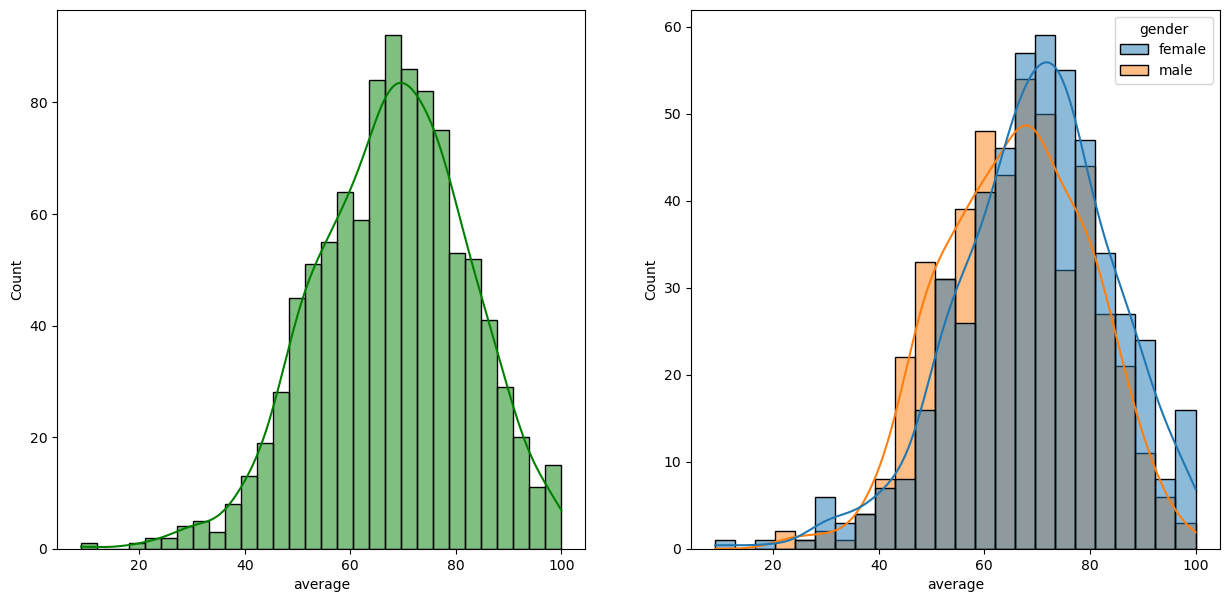

In [ ]:
#تذكر اني ال average content math,read,write score average=level student

fig, axs = plt.subplots(1, 2, figsize=(15, 7)) #بيجهز شكل (Figure) يحتوي على صف واحد وعمودين
plt.subplot(121) #بيكسر تاثير ال axs الي فوق
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()




 insight
- Female students tend to perform well then male students.


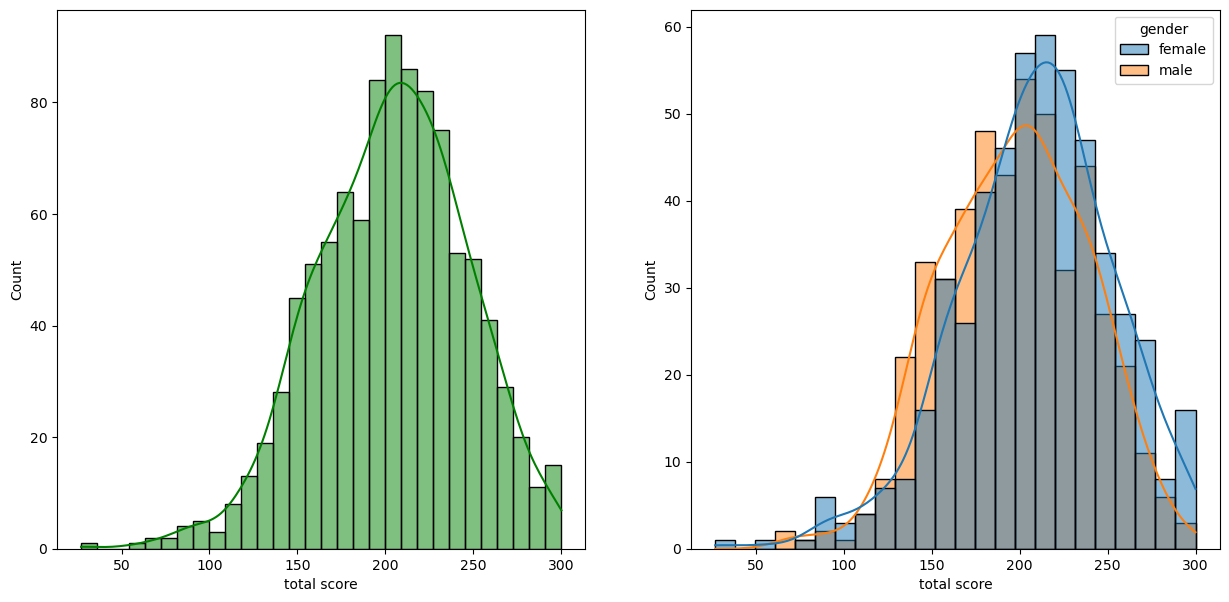

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

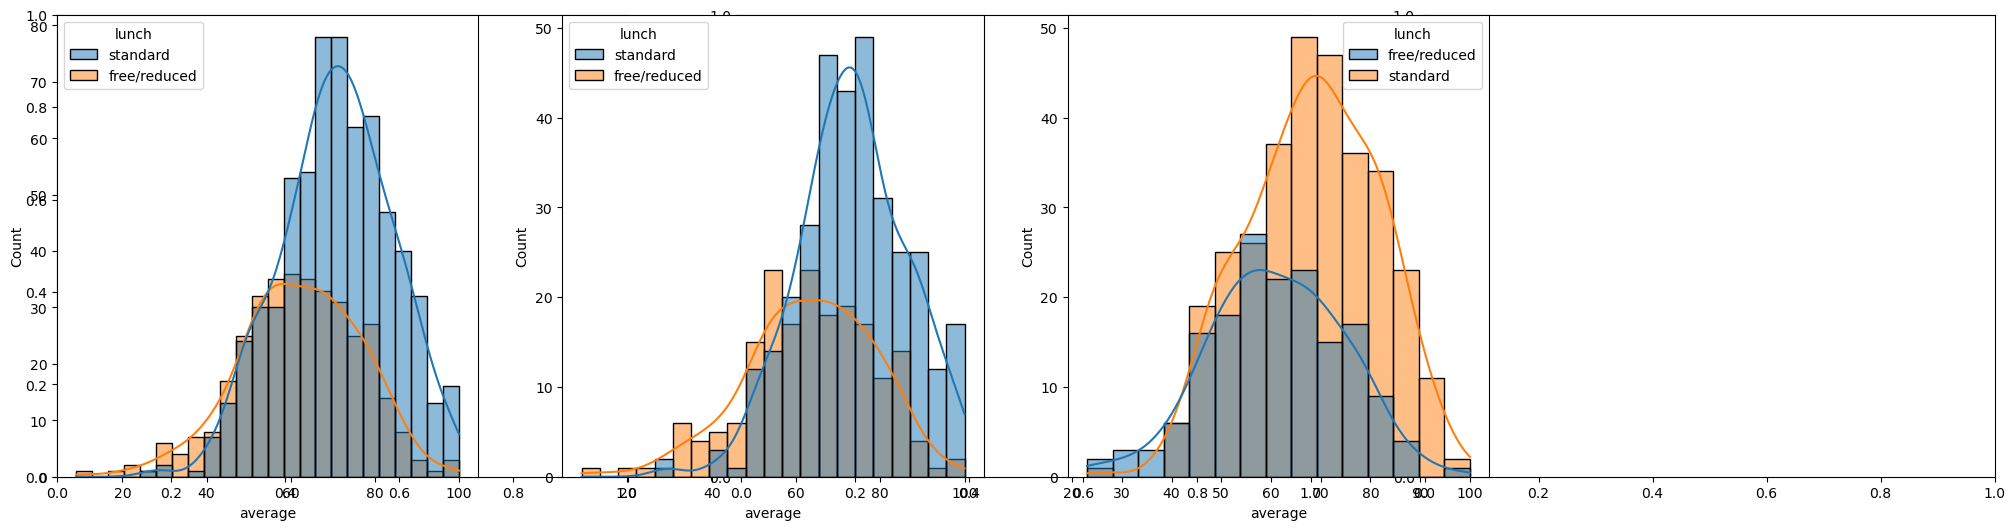

In [64]:
plt.subplots(1,3,figsize=(25,6)) #3*رسمه
plt.subplot(141)# لإنشاء شبكة من الرسومات (subplots) داخل نفس الشكل (Figure  #plt.subplot(nrows, ncols, index) صف واربع اعمده ودا رقم الرسمه 3(مكانها)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**
- In general parent's education don't help student perform well in exam.(لا يساعد تعليم الوالدين علي اداء الطالب)
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam (درجه الوالدين لو كانت باكلريوس او ماستر يودون اداء جيد)
- 3rd plot we can see there is no effect of parent's education on female students.(لا يوثر تعليم الوالدين علي مستوي البنات)

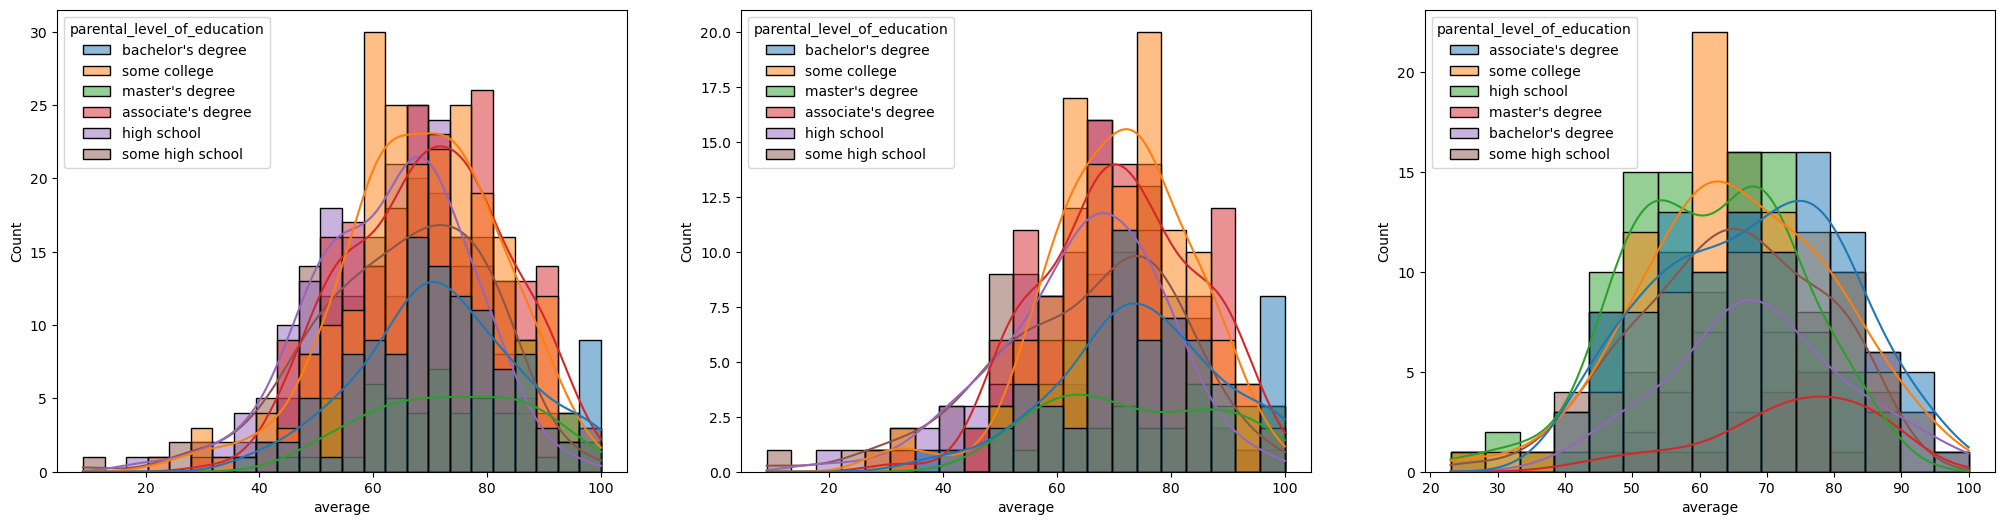

In [67]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


**Insights**
- How affect race_ethnicity (male) on perform 
- How affect race_ethnicity (female) on perform

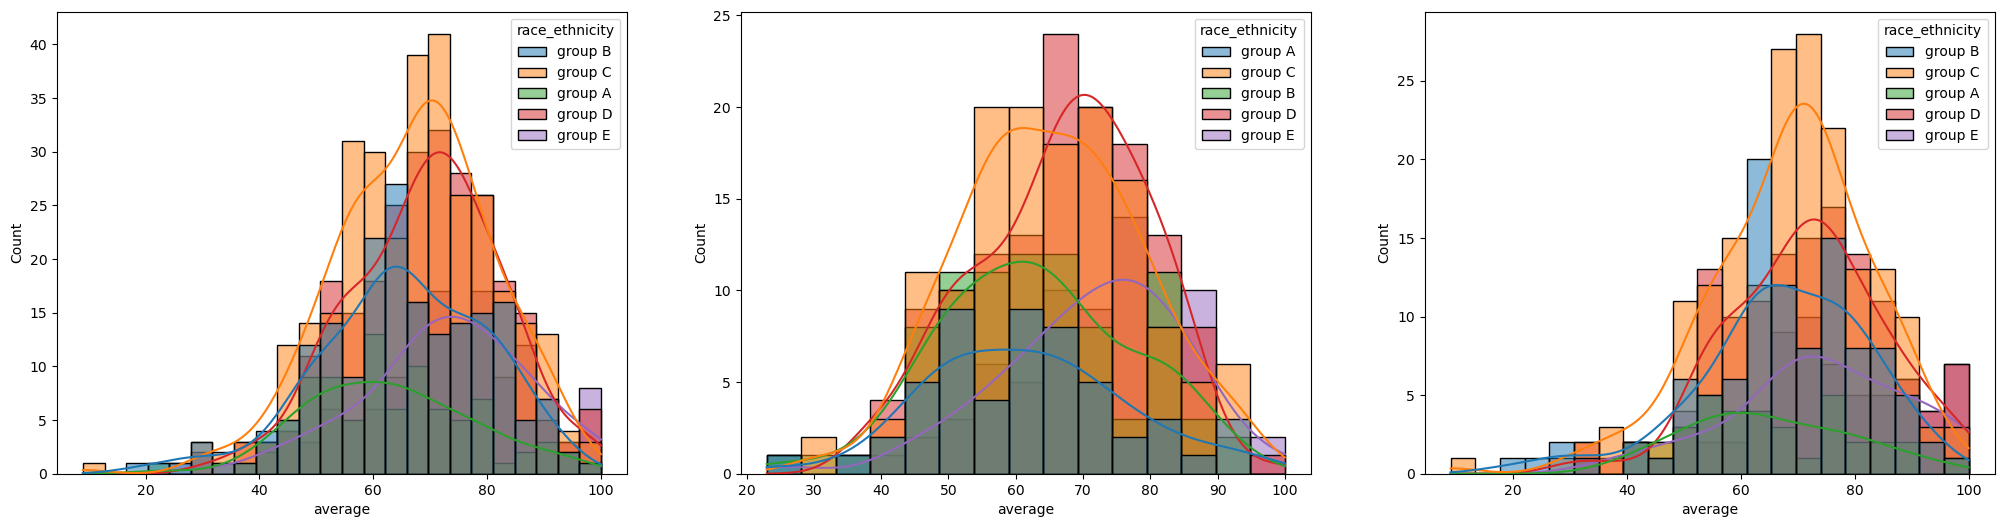

In [72]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(1,3,1)
sns.histplot(data=df,x='average',hue='race_ethnicity',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'male'],x='average',hue='race_ethnicity',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'female'],x='average',hue='race_ethnicity',kde=True)
plt.show()

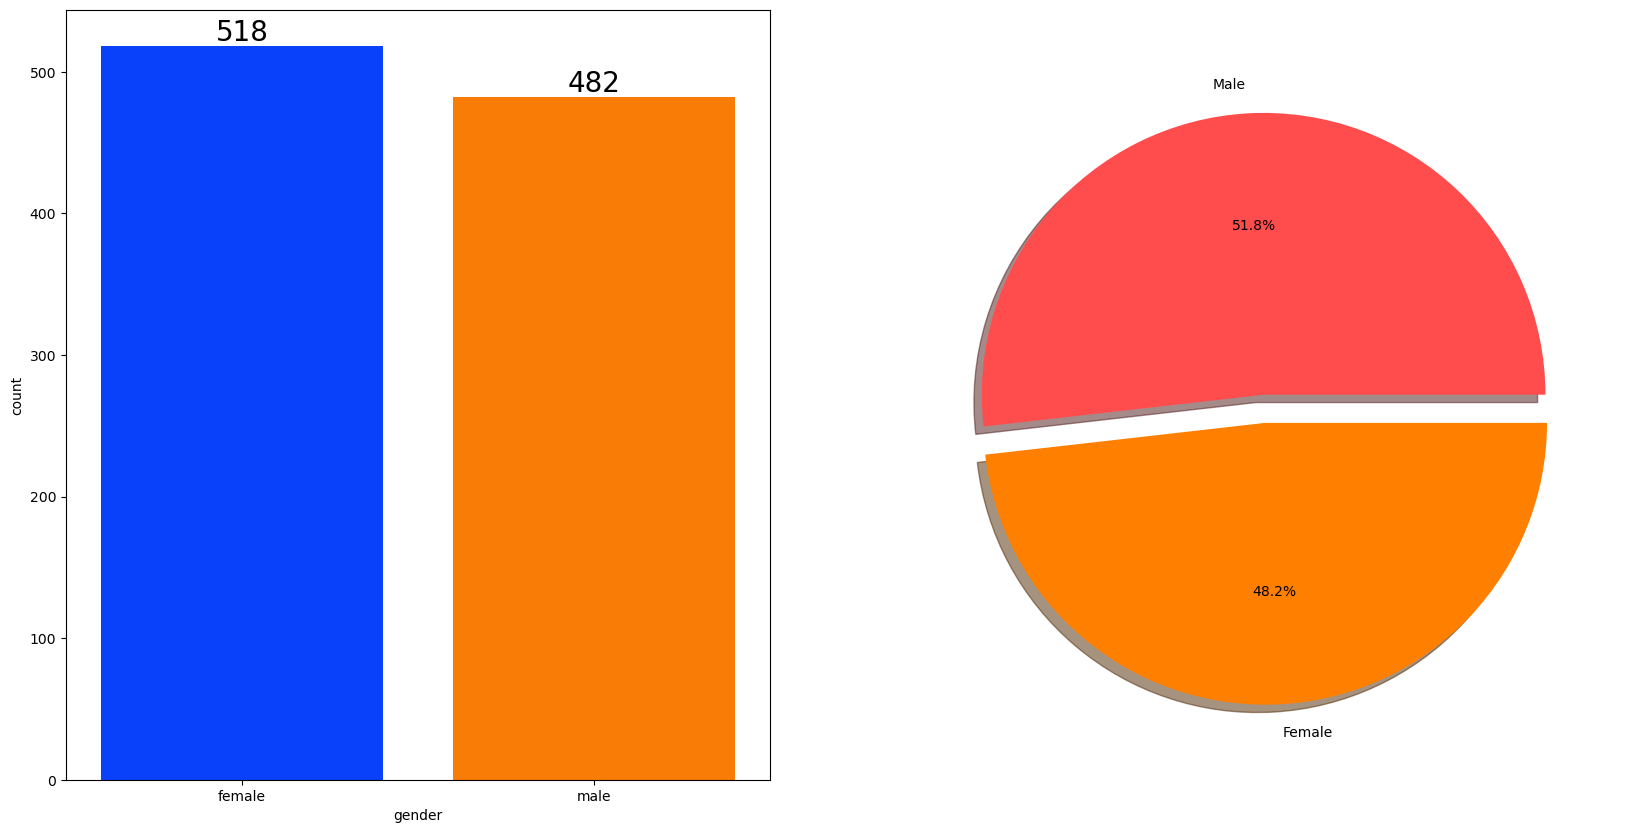

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
#Num of count in gender            نسبة التشبع اللوني / بتحدد الرسم يتم على أول الشبكه/ ألوان زاهية  
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
#Num of Gender on Bar
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
#Prec of gender 
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
                                                            #إضافة ظل للمخطط / إظهار النسبة المئوية داخل الشرائح/ تباعد شريحة الإناث للخارج   
plt.show()

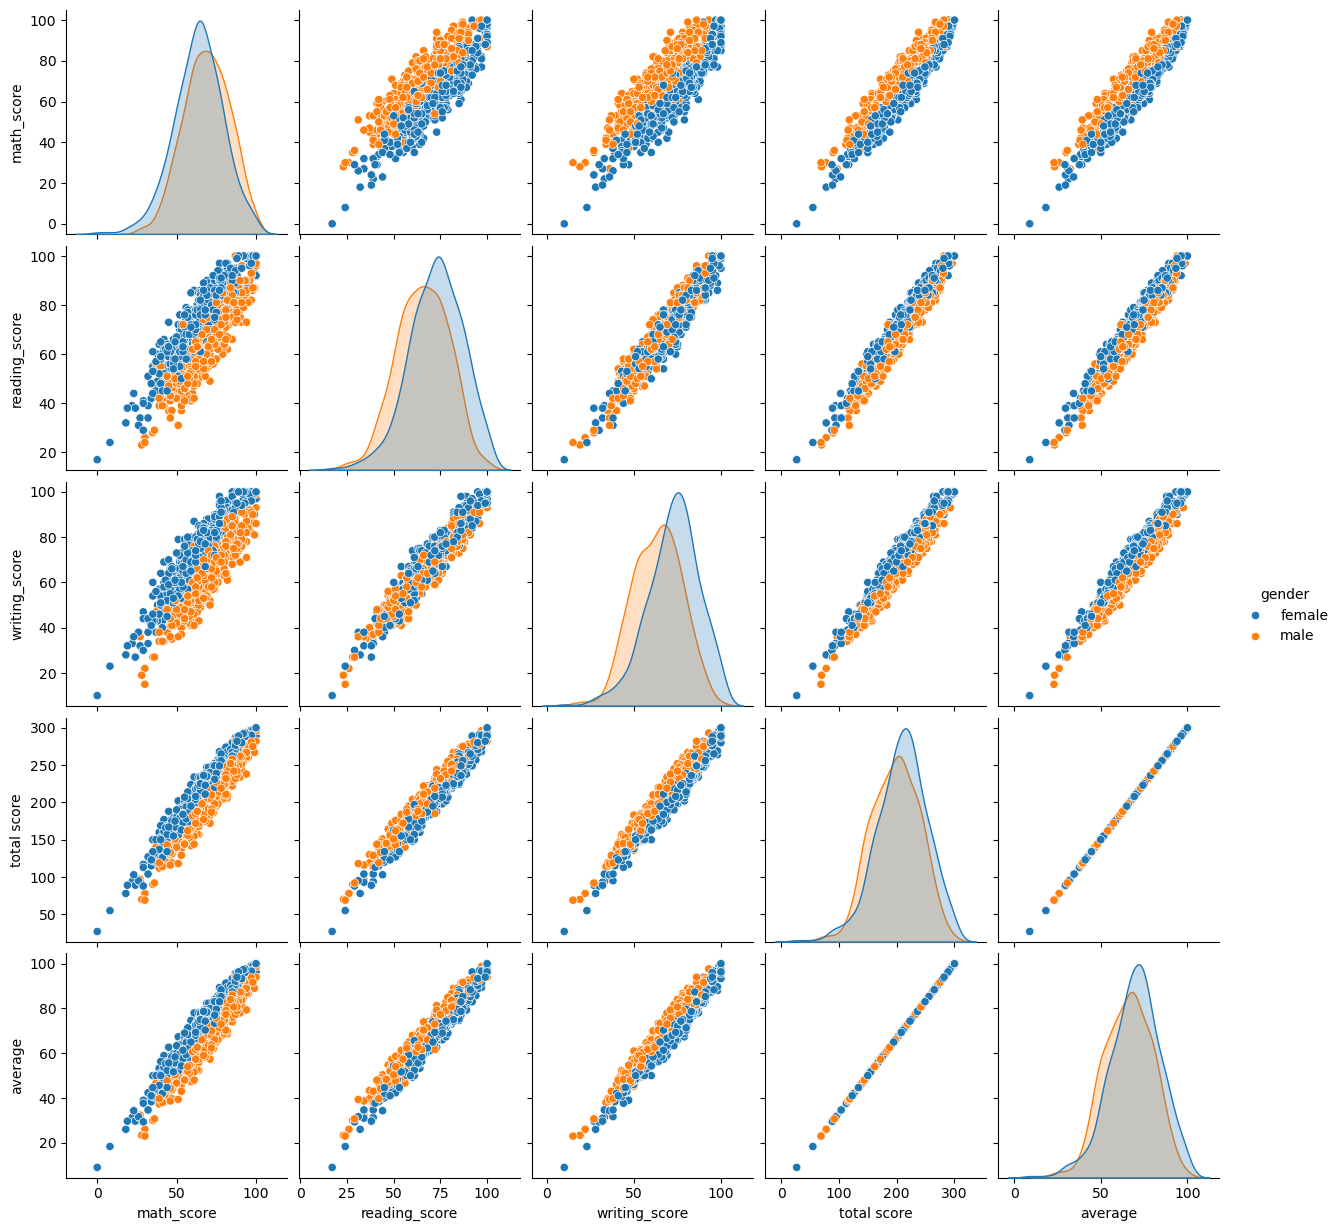

In [78]:
sns.pairplot(df,hue = 'gender')
plt.show()